In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pymongo



In [3]:
# Conectar ao MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Selecionar o banco de dados e a coleção
db = client["dnc"]
collection = db["traffic"]

In [4]:
# Extrair dados da coleção
data = list(collection.find())

# Criar um DataFrame
df = pd.DataFrame(data)

# Converter strings de datas para objetos datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

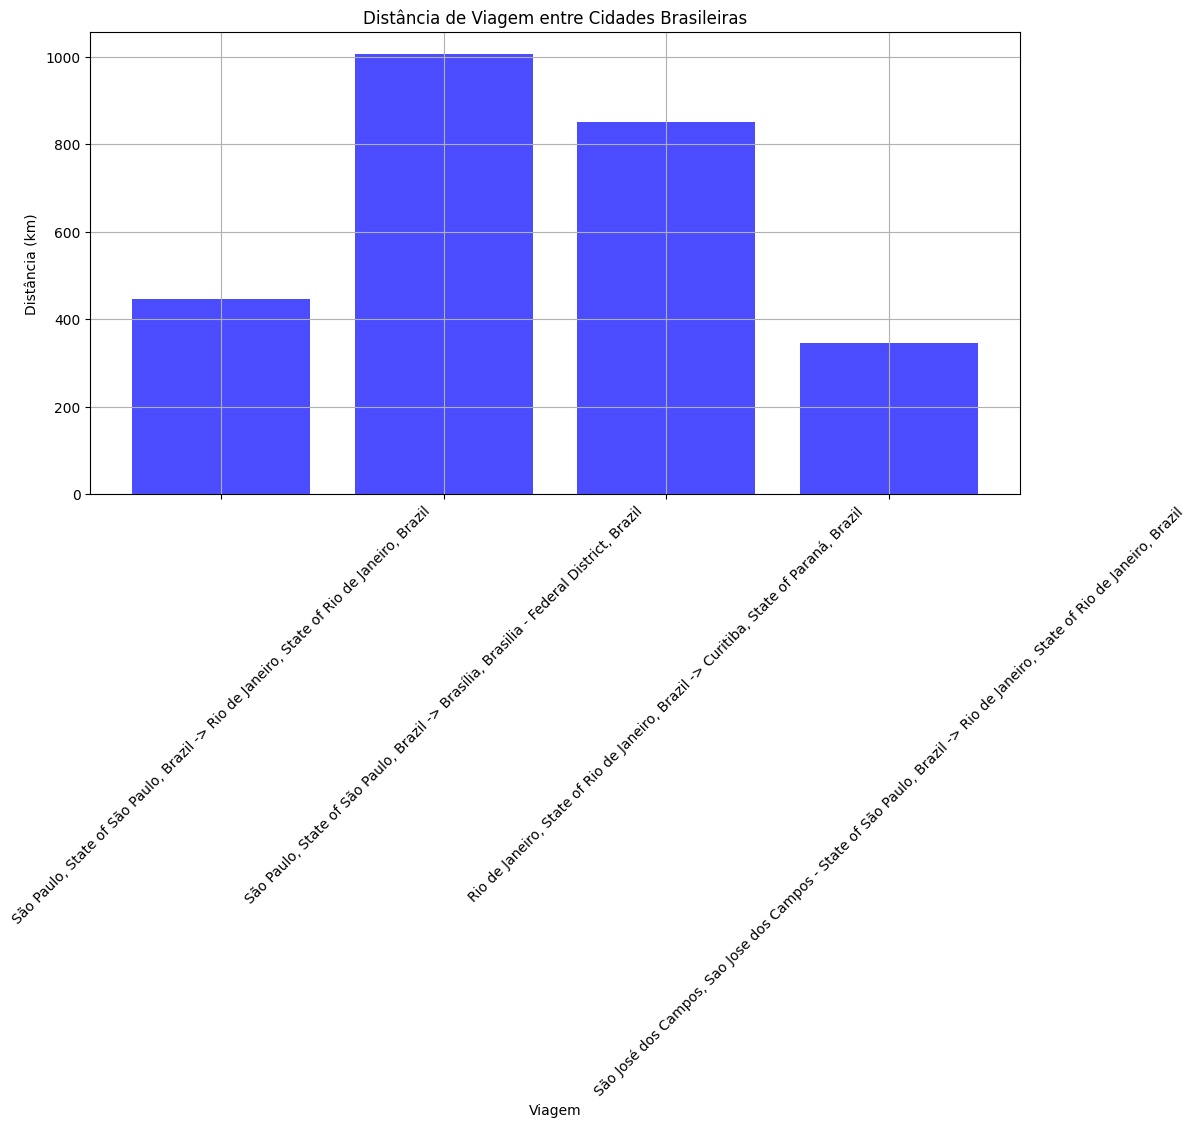

In [5]:
# Plotar a distância de viagem
plt.figure(figsize=(12, 6))
plt.bar(df['start_address'] + ' -> ' + df['end_address'], df['distance_value'] / 1000, color='blue', alpha=0.7)
plt.title('Distância de Viagem entre Cidades Brasileiras')
plt.xlabel('Viagem')
plt.ylabel('Distância (km)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

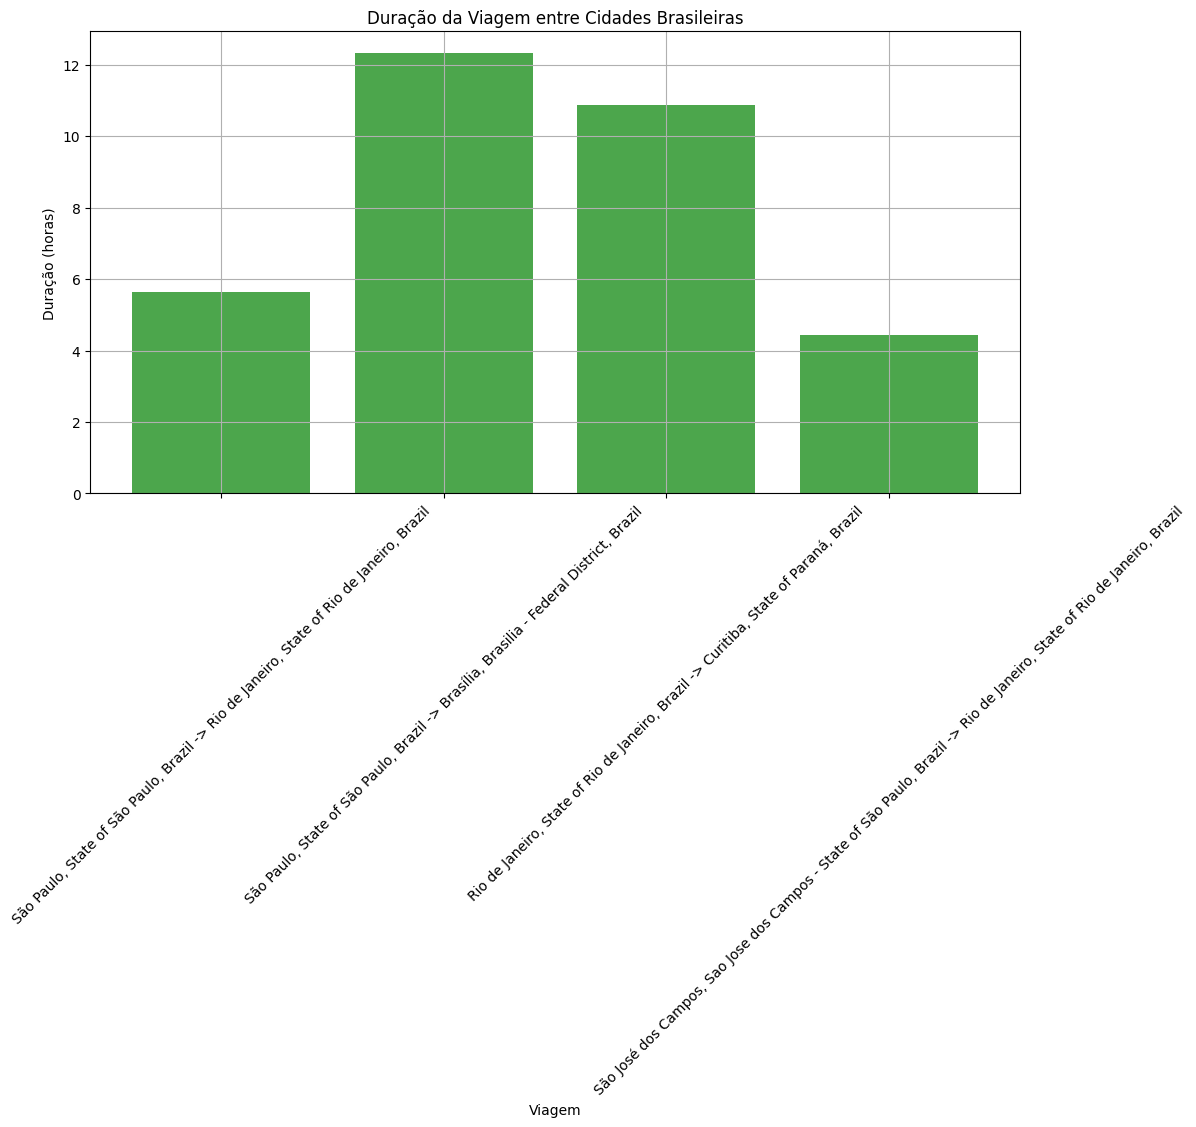

In [6]:
# Plotar a duração da viagem
plt.figure(figsize=(12, 6))
plt.bar(df['start_address'] + ' -> ' + df['end_address'], df['duration_value'] / 3600, color='green', alpha=0.7)
plt.title('Duração da Viagem entre Cidades Brasileiras')
plt.xlabel('Viagem')
plt.ylabel('Duração (horas)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

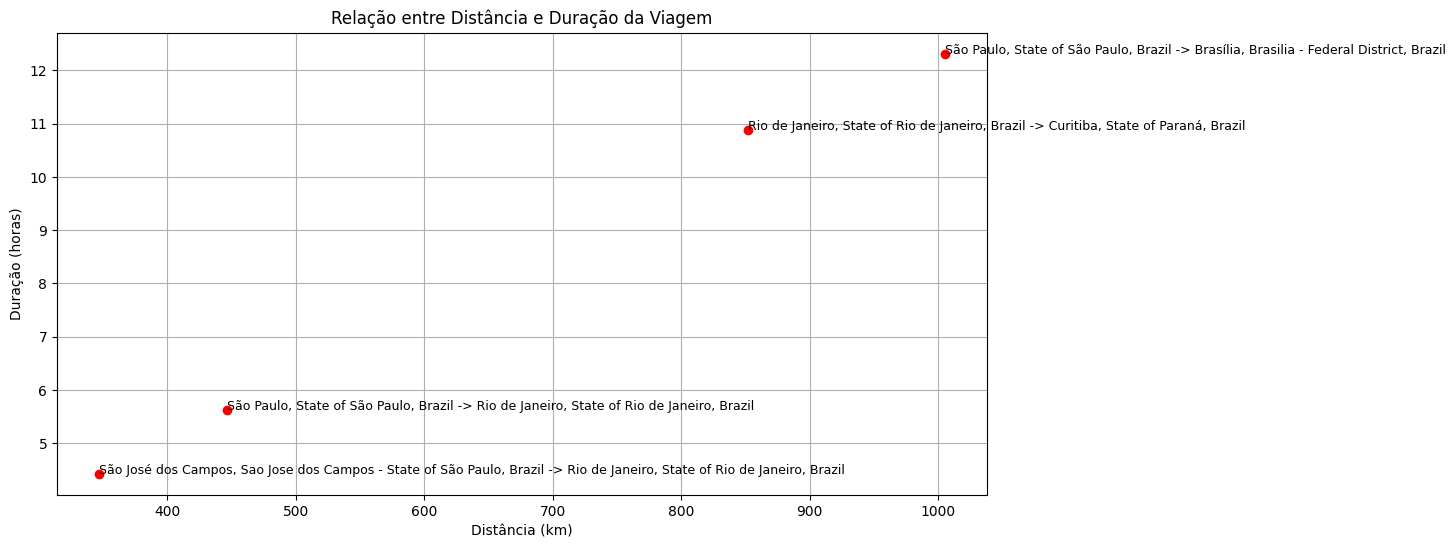

In [7]:
# Plotar a relação entre distância e duração
plt.figure(figsize=(12, 6))
plt.scatter(df['distance_value'] / 1000, df['duration_value'] / 3600, color='red')
for i, txt in enumerate(df['start_address'] + ' -> ' + df['end_address']):
    plt.annotate(txt, (df['distance_value'][i] / 1000, df['duration_value'][i] / 3600), fontsize=9)
plt.title('Relação entre Distância e Duração da Viagem')
plt.xlabel('Distância (km)')
plt.ylabel('Duração (horas)')
plt.grid(True)
plt.show()